In [8]:
from funcs import *
from qiskit.circuit.library import MCXGate

In [9]:
def single_oracle(qc, str):
    n = len(str)
    if not (qc.num_qubits == n + 1):
        raise ValueError("qubit_num disagrees with string_length")
    for i in range(n):
        if str[i] == '0':
            qc.x(i)
    gate = MCXGate(n)
    qc.append(gate, range(n+1))
    for i in range(n):
        if str[i] == '0':
            qc.x(i)
    return qc


In [10]:
def oracle(qc, support_set):
    for str in support_set:
        qc = single_oracle(qc, str)
    return qc

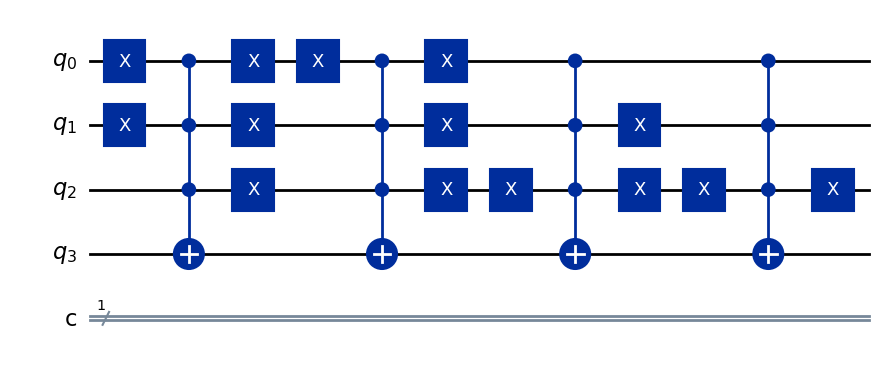

In [11]:
support_set = ['001', '010', '100', '110']
qc = QuantumCircuit(len(support_set[0])+1, 1)
# qc.initialize([0, 1], 1)
qc = oracle(qc, support_set)
qc.draw(output='mpl')

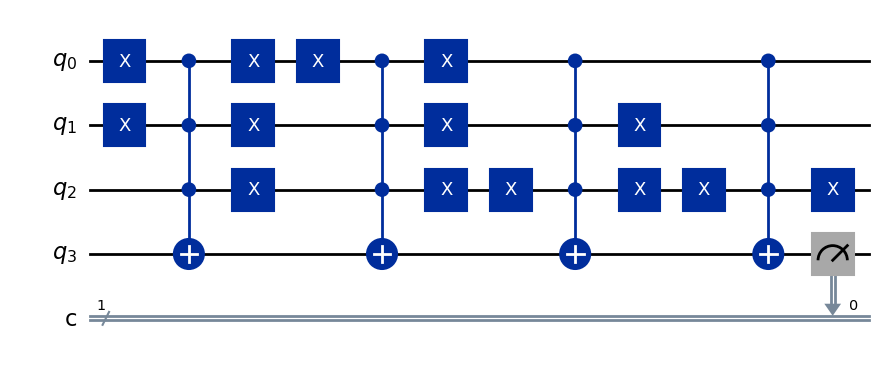

In [12]:
qc.measure(3, 0)
qc.draw(output='mpl')

In [13]:
results = execute_qc(qc)
print(results)

{'0': 1024}


### optimize quantum circuit

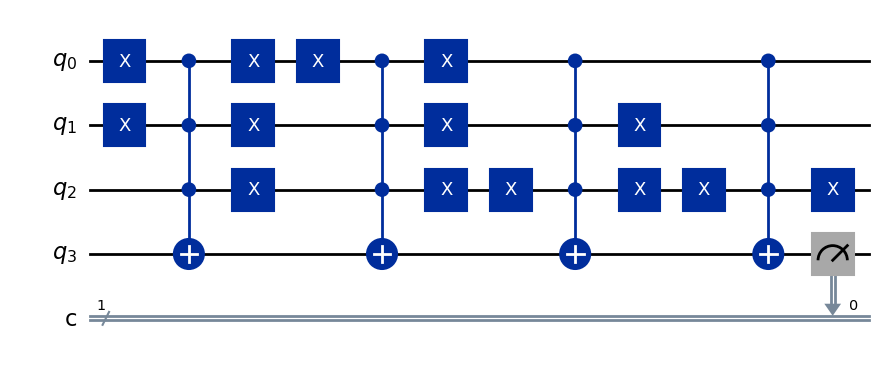

In [14]:
qc = optimize_qc(qc)
qc.draw(output='mpl')